# Load Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Import and Manipulate Bed Files

In [2]:
# specify column names
bed_columns = ["chr", "start", "end"]
bed_columns

['chr', 'start', 'end']

In [3]:
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed",
                     names = bed_columns)

df_k9 = pd.read_table( "../../qbb2020/data/K9me3.bed",
                     names = bed_columns)

df_k27 = pd.read_table( "../../qbb2020/data/K27me3.bed",
                     names = bed_columns)

df_k27

,chr,start,end
0,2L,5037,9637
1,2L,322173,326237
2,2L,365873,398837
3,2L,498973,547373
4,2L,579973,608037
...,...,...,...
426,X,20310691,20388555
427,X,20534591,20759055
428,X,20824191,20835255
429,X,20924791,20953755


In [4]:
raw_data = [df_k4, df_k9, df_k27]

For each data set, calculate widths

In [5]:
for dataset in raw_data:
    dataset.loc[:,"width"] = dataset.loc[:,"end"] - dataset.loc[:,"start"]

For each data set, create chromosome counts table

In [6]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()

chr_k9 = df_k9.loc[:,"chr"]
chr_k9 = chr_k9.value_counts()

chr_k27 = df_k27.loc[:,"chr"]
chr_k27 = chr_k27.value_counts()

chr_list = [chr_k4, chr_k9, chr_k27]
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

# Graphing

In [7]:
# Specify index order 
index_order_k4 = ['2L','2R','3L','3R', '4', 'X',  'Y', 'Y_CP007111v1_random']
index_order_k9 = ['2L','2R','3L','3R', '4', 'X',  'Y', 'Y_DS483690v1_random']
index_order_k27 = ['2L','2R','3L','3R', '4', 'X', 'Un_CP007080v1']

# Making a list of orders and titles for plotting
orders = [index_order_k4, index_order_k9, index_order_k27]
titles = ["K4 Chromosome Distribution", 
          "K9 Chromosome Distribution", 
          "K27 Chromosome Distribution"]

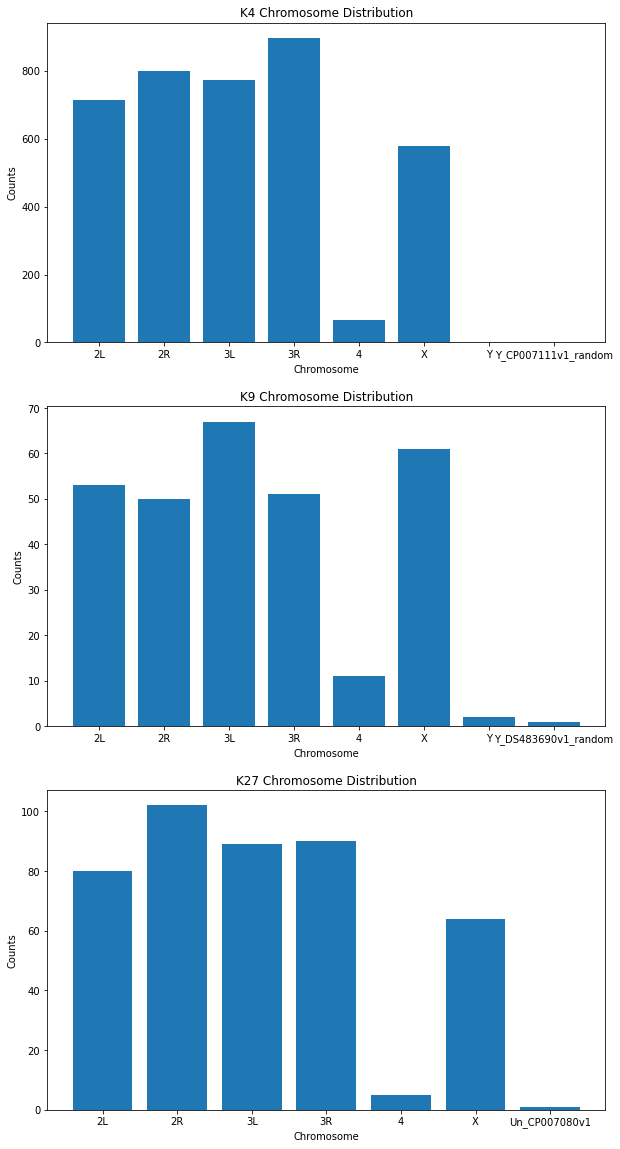

In [8]:
fig, ax = plt.subplots(figsize=(10,20), nrows=3)

for i in range(len(raw_data)):
    ax[i].bar( chr_list[i].loc[ orders[i] ].index, chr_list[i].loc[ orders[i] ] )
    # Generate bar graph 
    # Formatting
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("Chromosome")
    ax[i].set_ylabel("Counts")


plt.show()